<a href="https://colab.research.google.com/github/ajaymauryabbn/Machine-Learning-Algo/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementrng Simple Linear Regression Algo & Overfitting.

In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt


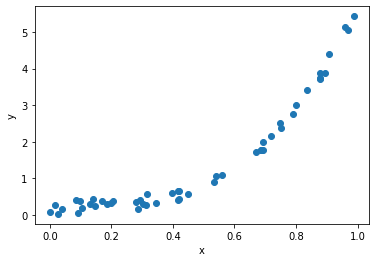

In [6]:
np.random.seed(1) # Taken seed as 1 so that random numbers come same everytime
X = np.random.rand(50,1) # 50 Random values between 0 & 1
y = 0.7*(X**5) +2.1*(X**4) + 2.3*(X**3) + 0.2*(X**2) + 0.3*X + 0.4*np.random.rand(50,1) # Our Linear regression function that we need to optimize
fig=plt.figure()
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

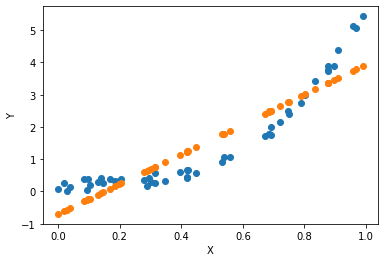

0.8312507706223713

In [7]:
from sklearn.linear_model import LinearRegression # Imorting Linear Regression from sklearn library
model = LinearRegression() # Creates an object for Linear Regression model
model.fit(X, y) #fitting model to x & y 
output = model.predict(X) #model is predicting output

fig = plt.figure()
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
display(model.score(X, y))

For Linear model , we got model score as 0.83 which is low as our data is distributed in 6 degree polynomial

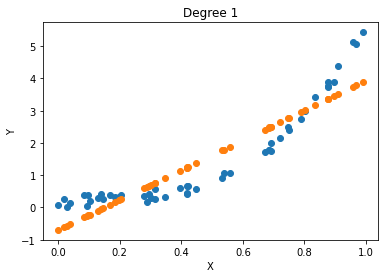

0.8312507706223713

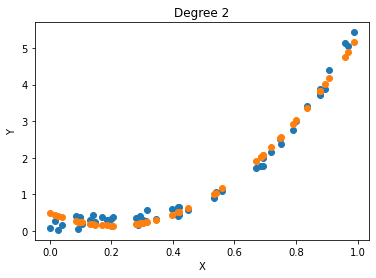

0.9863175722127799

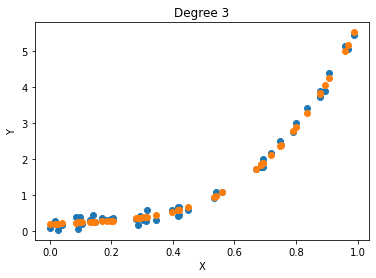

0.995475984627412

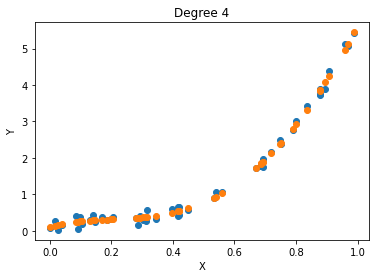

0.9958465481778923

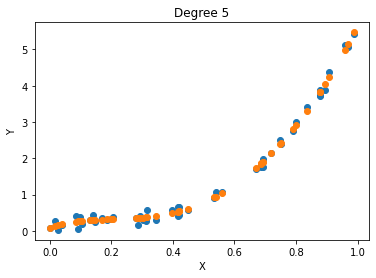

0.9958914719438248

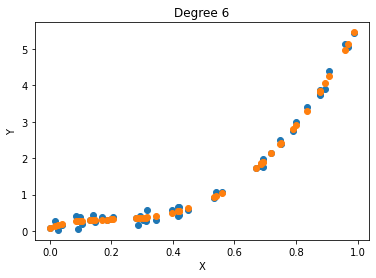

0.9959066618952721

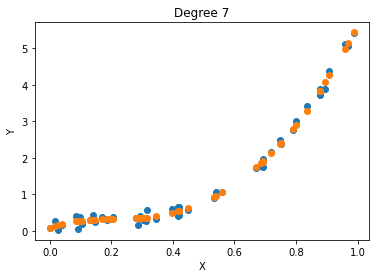

0.9959252662917378

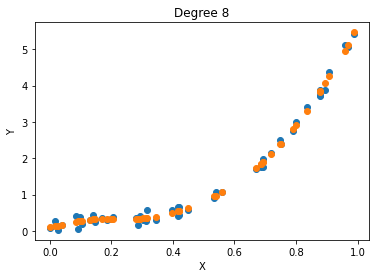

0.9959749250494574

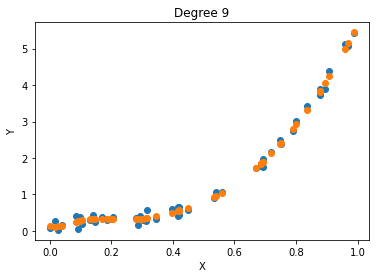

0.996026861814309

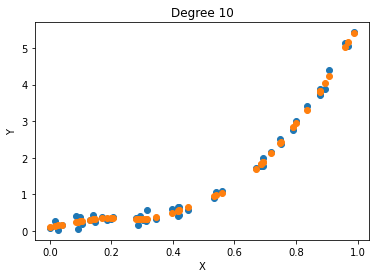

0.9961862118609578

[0.8312507706223713, 0.9863175722127799, 0.995475984627412, 0.9958465481778923, 0.9958914719438248, 0.9959066618952721, 0.9959252662917378, 0.9959749250494574, 0.996026861814309, 0.9961862118609578]


In [15]:
from sklearn.preprocessing import PolynomialFeatures # Imporing polynomial features so that we  can check for higher degree
from sklearn.preprocessing import StandardScaler # for standarisation 
scores = []
for i in range(1, 11): # To check for polynomial till 10 degree
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X)
    scaler = StandardScaler()
    scaler.fit(X_poly) #fitting
    X_poly_scaled = scaler.transform(X_poly) #transforming
    model = LinearRegression()
    model.fit(X_poly_scaled, y)
    output = model.predict(X_poly_scaled)
    
    fig = plt.figure()
    plt.scatter(X, y, label="samples")
    plt.scatter(X, output, label="prediction")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Degree {i}")
    plt.show()
    display(model.score(X_poly_scaled, y))
    scores.append(model.score(X_poly_scaled, y))
print(scores)

As Degree of polynomial used is increasing model score is increasing till degree 6 as it is same degree of Input data.

After this model tries to overfit the noise in data, so our model performance is not increasing.

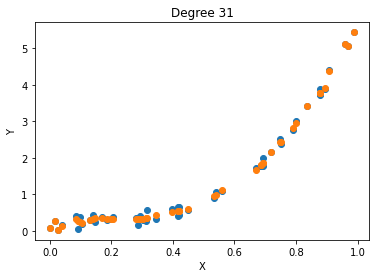

0.9973224957232818

In [14]:
#Overfit like crazy
degree = 31
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)
scaler = StandardScaler()
scaler.fit(X_poly)
X_poly_scaled = scaler.transform(X_poly)
model = LinearRegression()
model.fit(X_poly_scaled, y)
output = model.predict(X_poly_scaled)
fig = plt.figure()
plt.scatter(X, y, label="ground truth")
plt.scatter(X, output, label="prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Degree {degree}")
plt.show()
display(model.score(X_poly_scaled, y))
scores.append(model.score(X_poly_scaled, y))